# settings

In [1]:
#la rede va a coger los primeros 128 y assim sucessivamente até recoger todos los datos
# la rede acaba de entrenar y vuelve a entrenar otra vez el dataset dependendo del numero que le pongamos en epochs
BATCH_SIZE = 128 # los blocos de 128 datos van sendo cogidos aleatoriamente y luego no los vuelve a coger hasta que llegue al siguinete epochs
EPOCHS = 12 # nº de veces que recoge el dataset

NUM_CLASSES = 10 #nº de clases inicial -> el model nos da la probabilidad de que ese digito pertenezca a la clase 0, 1, 2 hasta el 9
IMG_ROWS, IMG_COLS = 28, 28 # las dimensiones de la imagene.

#IMPORTANT: Todas las imagénes tienen que tener las mismas dimensiones!


# data loading

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [3]:
x_train.shape #tenemos un array con 60000 imagenes de 28 por 28

(60000, 28, 28)

In [4]:
y_train #tenemos nº de 0 al 9

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
import matplotlib.pyplot as plt

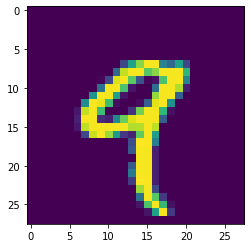

In [10]:
#para visualizar cada una de las imagenes:
plt.imshow(x_train[4]);

In [11]:
y_train[4]

9

# preprocessing

In [12]:
#1º tenemos que redimensionar nuestro array de numpy, para que tenga los canales:
x_train.shape

(60000, 28, 28)

In [13]:
#mira que backend está utilizando keras:
import keras.backend as K

In [15]:
K.image_data_format() #hay que pasar los chaneles de color (3) al final

'channels_last'

In [16]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, IMG_ROWS, IMG_COLS)
    x_test = x_test.reshape(x_test.shape[0], 1, IMG_ROWS, IMG_COLS)
    INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)
else:
    x_train = x_train.reshape(x_train.shape[0], IMG_ROWS, IMG_COLS, 1)
    x_test = x_test.reshape(x_test.shape[0], IMG_ROWS, IMG_COLS, 1)
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

In [17]:
#ahora sí ya le hemos pasado una dimension extra, porque ya tiene un channel
#al tener 1 es como si hayamos creado una dimensión más
x_train.shape

(60000, 28, 28, 1)

In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [19]:
x_train /= 255
x_test /= 255

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
from keras.utils import to_categorical

In [22]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [24]:
y_train.shape

(60000, 10)

# modeling

In [25]:
#Definir la rede

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense #importar la capa deseada

In [34]:
model = Sequential()
#input_shape -> num de rows, num de cols, por nº de channels
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
#vamos a añadir una capa más, Maxpooling -> de cada conjunto se queda con el máximo valor pero no entrena el filtro
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#capa de dropout, de la capa anterior de forma aleatorio se elimina 25% de las unidades durante el entrenamento, para evitar sobreajuste, como una neurona de una capa recibe el input de la capa anterior, entonces hay veces que aleatoriamente no lo recibe, así la unidad no se puede fiar en totalidad de lo que está recibindo
model.add(Dropout(0.25))
#capa flatel -> pasar de una dimensiones locas y le pasamos a un vector
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [37]:
from keras.optimizers import Adadelta
from keras.losses import categorical_crossentropy

In [39]:
model.compile(loss=categorical_crossentropy,
             optimizer=Adadelta(),
             metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [41]:
#entrenar el modelo
model.fit(x_train, y_train,
         batch_size=BATCH_SIZE,
         epochs=EPOCHS,
         verbose=1,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2776 - accuracy: 0.9146 - val_loss: 0.0626 - val_accuracy: 0.9796
Epoch 2/12
47488/60000 [======================>.......] - ETA: 21s - loss: 0.0953 - accuracy: 0.9724

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])